# Step 1: Importing libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import os
import tensorflow
from tensorflow.keras.utils import to_categorical

# Step 2: Loading Dataset

In [3]:
dataset = pd.read_csv('Concrete_Data_Yeh.csv')
dataset.head()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


# Step 3: Identifying features and target

In [4]:
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values
X[:5]

array([[ 540. ,    0. ,    0. ,  162. ,    2.5, 1040. ,  676. ,   28. ],
       [ 540. ,    0. ,    0. ,  162. ,    2.5, 1055. ,  676. ,   28. ],
       [ 332.5,  142.5,    0. ,  228. ,    0. ,  932. ,  594. ,  270. ],
       [ 332.5,  142.5,    0. ,  228. ,    0. ,  932. ,  594. ,  365. ],
       [ 198.6,  132.4,    0. ,  192. ,    0. ,  978.4,  825.5,  360. ]])

# Step 4: Splitting train and test data

In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.2) 

In [6]:
X_train.shape

(824, 8)

# Step 5: Building models

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

def model_():
    model = Sequential()

    model.add(Dense(10,input_shape=(X.shape[1],),activation='tanh')) # tanh -1 s 1 k beech mein values return krta hai
    model.add(Dense(8,activation='tanh'))
    model.add(Dense(6,activation='tanh'))
    model.add(Dense(1))

    model.compile(optimizer=Adam(lr=0.04), loss='mse', metrics=['mae'])

    model.summary()
    return model

# Step 6: Fitting & validating model

In [8]:
model = model_()
history = model.fit(X_train,y_train,epochs=10, validation_data = (X_test, y_test))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                90        
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 88        
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 54        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 7         
Total params: 239
Trainable params: 239
Non-trainable params: 0
_________________________________________________________________
Train on 824 samples, validate on 206 samples
Epoch 1/10
824/824 [==============================] - 1s 1ms/sample - loss: 1174.3572 - mae: 30.0491 - val_loss: 1015.7470 - val_mae: 26.7918
Epoch 2/10
824/824 [==============================] - 0s 116us/sampl

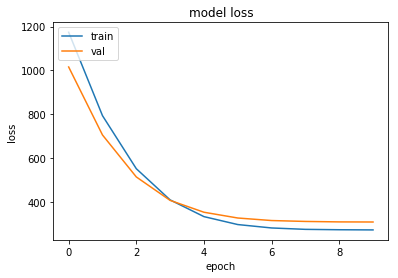

In [9]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# Step 7: Underfitting & validating model

In [10]:
model = model_()
history = model.fit(X_train[:100],y_train[:100],epochs=3, validation_data = (X_test, y_test))

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 10)                90        
_________________________________________________________________
dense_5 (Dense)              (None, 8)                 88        
_________________________________________________________________
dense_6 (Dense)              (None, 6)                 54        
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 7         
Total params: 239
Trainable params: 239
Non-trainable params: 0
_________________________________________________________________
Train on 100 samples, validate on 206 samples
Epoch 1/3
100/100 [==============================] - 1s 6ms/sample - loss: 1582.3319 - mae: 36.3507 - val_loss: 1466.6934 - val_mae: 34.0539
Epoch 2/3
100/100 [==============================] - 0s 362us/sampl

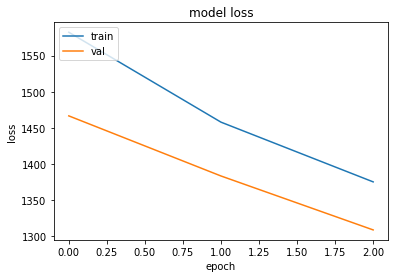

In [11]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# Step 8: Overfitting & validating model

In [12]:
model = model_()
history = model.fit(X_train[:10],y_train[:10],epochs=500, validation_data = (X_test, y_test))

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 10)                90        
_________________________________________________________________
dense_9 (Dense)              (None, 8)                 88        
_________________________________________________________________
dense_10 (Dense)             (None, 6)                 54        
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 7         
Total params: 239
Trainable params: 239
Non-trainable params: 0
_________________________________________________________________
Train on 10 samples, validate on 206 samples
Epoch 1/500
10/10 [==============================] - 1s 53ms/sample - loss: 1583.3901 - mae: 36.9700 - val_loss: 1576.9354 - val_mae: 35.6355
Epoch 2/500
10/10 [==============================] - 0s 3ms/sample 

Epoch 53/500
10/10 [==============================] - 0s 3ms/sample - loss: 692.3223 - mae: 22.2417 - val_loss: 741.3300 - val_mae: 21.8932
Epoch 54/500
10/10 [==============================] - 0s 2ms/sample - loss: 681.6781 - mae: 22.0455 - val_loss: 731.2355 - val_mae: 21.7236
Epoch 55/500
10/10 [==============================] - 0s 3ms/sample - loss: 671.2230 - mae: 21.8506 - val_loss: 721.3257 - val_mae: 21.5623
Epoch 56/500
10/10 [==============================] - 0s 3ms/sample - loss: 660.9552 - mae: 21.6569 - val_loss: 711.5985 - val_mae: 21.4036
Epoch 57/500
10/10 [==============================] - 0s 3ms/sample - loss: 650.8722 - mae: 21.4646 - val_loss: 702.0518 - val_mae: 21.2459
Epoch 58/500
10/10 [==============================] - 0s 3ms/sample - loss: 640.9723 - mae: 21.2736 - val_loss: 692.6835 - val_mae: 21.0894
Epoch 59/500
10/10 [==============================] - 0s 3ms/sample - loss: 631.2531 - mae: 21.0839 - val_loss: 683.4914 - val_mae: 20.9339
Epoch 60/500
10/10 [

Epoch 112/500
10/10 [==============================] - 0s 2ms/sample - loss: 319.4933 - mae: 14.7705 - val_loss: 393.2399 - val_mae: 15.8377
Epoch 113/500
10/10 [==============================] - 0s 3ms/sample - loss: 316.4848 - mae: 14.6811 - val_loss: 390.5244 - val_mae: 15.7947
Epoch 114/500
10/10 [==============================] - 0s 2ms/sample - loss: 313.5511 - mae: 14.5926 - val_loss: 387.8800 - val_mae: 15.7529
Epoch 115/500
10/10 [==============================] - 0s 2ms/sample - loss: 310.6907 - mae: 14.5050 - val_loss: 385.3054 - val_mae: 15.7122
Epoch 116/500
10/10 [==============================] - 0s 2ms/sample - loss: 307.9024 - mae: 14.4183 - val_loss: 382.7991 - val_mae: 15.6720
Epoch 117/500
10/10 [==============================] - 0s 2ms/sample - loss: 305.1845 - mae: 14.3326 - val_loss: 380.3596 - val_mae: 15.6330
Epoch 118/500
10/10 [==============================] - 0s 3ms/sample - loss: 302.5359 - mae: 14.2477 - val_loss: 377.9856 - val_mae: 15.5950
Epoch 119/500

Epoch 171/500
10/10 [==============================] - 0s 2ms/sample - loss: 230.4626 - mae: 12.0210 - val_loss: 316.0126 - val_mae: 14.5579
Epoch 172/500
10/10 [==============================] - 0s 2ms/sample - loss: 229.9320 - mae: 12.0210 - val_loss: 315.6028 - val_mae: 14.5518
Epoch 173/500
10/10 [==============================] - 0s 2ms/sample - loss: 229.4191 - mae: 12.0210 - val_loss: 315.2087 - val_mae: 14.5459
Epoch 174/500
10/10 [==============================] - 0s 2ms/sample - loss: 228.9234 - mae: 12.0210 - val_loss: 314.8297 - val_mae: 14.5407
Epoch 175/500
10/10 [==============================] - 0s 3ms/sample - loss: 228.4444 - mae: 12.0210 - val_loss: 314.4653 - val_mae: 14.5355
Epoch 176/500
10/10 [==============================] - 0s 2ms/sample - loss: 227.9815 - mae: 12.0210 - val_loss: 314.1152 - val_mae: 14.5304
Epoch 177/500
10/10 [==============================] - 0s 2ms/sample - loss: 227.5344 - mae: 12.0210 - val_loss: 313.7789 - val_mae: 14.5254
Epoch 178/500

Epoch 230/500
10/10 [==============================] - 0s 2ms/sample - loss: 217.3289 - mae: 12.4441 - val_loss: 307.2684 - val_mae: 14.4374
Epoch 231/500
10/10 [==============================] - 0s 2ms/sample - loss: 217.2743 - mae: 12.4491 - val_loss: 307.2526 - val_mae: 14.4369
Epoch 232/500
10/10 [==============================] - 0s 2ms/sample - loss: 217.2219 - mae: 12.4540 - val_loss: 307.2384 - val_mae: 14.4364
Epoch 233/500
10/10 [==============================] - 0s 2ms/sample - loss: 217.1718 - mae: 12.4589 - val_loss: 307.2255 - val_mae: 14.4360
Epoch 234/500
10/10 [==============================] - 0s 2ms/sample - loss: 217.1238 - mae: 12.4636 - val_loss: 307.2141 - val_mae: 14.4355
Epoch 235/500
10/10 [==============================] - 0s 2ms/sample - loss: 217.0779 - mae: 12.4683 - val_loss: 307.2039 - val_mae: 14.4351
Epoch 236/500
10/10 [==============================] - 0s 2ms/sample - loss: 217.0340 - mae: 12.4729 - val_loss: 307.1949 - val_mae: 14.4346
Epoch 237/500

Epoch 289/500
10/10 [==============================] - 0s 2ms/sample - loss: 216.1867 - mae: 12.6148 - val_loss: 307.4137 - val_mae: 14.4285
Epoch 290/500
10/10 [==============================] - 0s 2ms/sample - loss: 216.1835 - mae: 12.6162 - val_loss: 307.4204 - val_mae: 14.4285
Epoch 291/500
10/10 [==============================] - 0s 2ms/sample - loss: 216.1805 - mae: 12.6175 - val_loss: 307.4269 - val_mae: 14.4284
Epoch 292/500
10/10 [==============================] - 0s 2ms/sample - loss: 216.1776 - mae: 12.6188 - val_loss: 307.4334 - val_mae: 14.4285
Epoch 293/500
10/10 [==============================] - 0s 2ms/sample - loss: 216.1749 - mae: 12.6200 - val_loss: 307.4398 - val_mae: 14.4284
Epoch 294/500
10/10 [==============================] - 0s 2ms/sample - loss: 216.1723 - mae: 12.6212 - val_loss: 307.4461 - val_mae: 14.4285
Epoch 295/500
10/10 [==============================] - 0s 2ms/sample - loss: 216.1699 - mae: 12.6224 - val_loss: 307.4523 - val_mae: 14.4285
Epoch 296/500

Epoch 348/500
10/10 [==============================] - 0s 2ms/sample - loss: 216.1298 - mae: 12.6553 - val_loss: 307.6512 - val_mae: 14.4286
Epoch 349/500
10/10 [==============================] - 0s 2ms/sample - loss: 216.1297 - mae: 12.6556 - val_loss: 307.6530 - val_mae: 14.4286
Epoch 350/500
10/10 [==============================] - 0s 2ms/sample - loss: 216.1296 - mae: 12.6558 - val_loss: 307.6547 - val_mae: 14.4286
Epoch 351/500
10/10 [==============================] - 0s 2ms/sample - loss: 216.1295 - mae: 12.6560 - val_loss: 307.6564 - val_mae: 14.4287
Epoch 352/500
10/10 [==============================] - 0s 2ms/sample - loss: 216.1294 - mae: 12.6563 - val_loss: 307.6580 - val_mae: 14.4287
Epoch 353/500
10/10 [==============================] - 0s 2ms/sample - loss: 216.1293 - mae: 12.6565 - val_loss: 307.6596 - val_mae: 14.4287
Epoch 354/500
10/10 [==============================] - 0s 2ms/sample - loss: 216.1293 - mae: 12.6567 - val_loss: 307.6611 - val_mae: 14.4287
Epoch 355/500

Epoch 407/500
10/10 [==============================] - 0s 2ms/sample - loss: 216.1283 - mae: 12.6623 - val_loss: 307.6999 - val_mae: 14.4293
Epoch 408/500
10/10 [==============================] - 0s 3ms/sample - loss: 216.1283 - mae: 12.6623 - val_loss: 307.7002 - val_mae: 14.4293
Epoch 409/500
10/10 [==============================] - 0s 2ms/sample - loss: 216.1283 - mae: 12.6624 - val_loss: 307.7004 - val_mae: 14.4293
Epoch 410/500
10/10 [==============================] - 0s 3ms/sample - loss: 216.1283 - mae: 12.6624 - val_loss: 307.7006 - val_mae: 14.4293
Epoch 411/500
10/10 [==============================] - 0s 2ms/sample - loss: 216.1283 - mae: 12.6624 - val_loss: 307.7009 - val_mae: 14.4293
Epoch 412/500
10/10 [==============================] - 0s 3ms/sample - loss: 216.1283 - mae: 12.6625 - val_loss: 307.7011 - val_mae: 14.4293
Epoch 413/500
10/10 [==============================] - 0s 2ms/sample - loss: 216.1283 - mae: 12.6625 - val_loss: 307.7013 - val_mae: 14.4293
Epoch 414/500

Epoch 466/500
10/10 [==============================] - 0s 2ms/sample - loss: 216.1283 - mae: 12.6631 - val_loss: 307.7059 - val_mae: 14.4293
Epoch 467/500
10/10 [==============================] - 0s 2ms/sample - loss: 216.1283 - mae: 12.6631 - val_loss: 307.7059 - val_mae: 14.4293
Epoch 468/500
10/10 [==============================] - 0s 2ms/sample - loss: 216.1282 - mae: 12.6631 - val_loss: 307.7059 - val_mae: 14.4293
Epoch 469/500
10/10 [==============================] - 0s 2ms/sample - loss: 216.1283 - mae: 12.6631 - val_loss: 307.7060 - val_mae: 14.4293
Epoch 470/500
10/10 [==============================] - 0s 2ms/sample - loss: 216.1283 - mae: 12.6631 - val_loss: 307.7060 - val_mae: 14.4293
Epoch 471/500
10/10 [==============================] - 0s 2ms/sample - loss: 216.1282 - mae: 12.6631 - val_loss: 307.7060 - val_mae: 14.4293
Epoch 472/500
10/10 [==============================] - 0s 2ms/sample - loss: 216.1283 - mae: 12.6632 - val_loss: 307.7060 - val_mae: 14.4293
Epoch 473/500

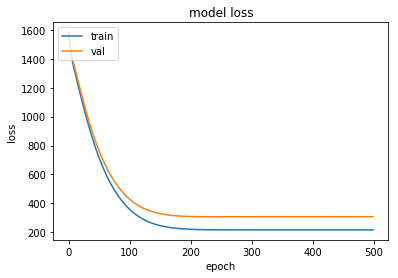

In [13]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()